In [1]:
from PIL import Image, ImageDraw, ImageOps
import math
from pain import gen_valid_cam
import numpy as np
import random
from PIL import ImageTransform
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely import affinity
import matplotlib.pyplot as plt
import os

In [2]:
img = Image.open("target_images/cross,Blue,Q,Yellow.png")
img
bgd_img = Image.open("master_background.png")

In [3]:
cam, intersection, bgd, rot = gen_valid_cam()
print(rot)

283
59
16
182
pog
182


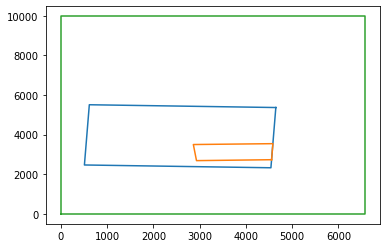

In [4]:

plt.plot(*cam.exterior.xy)
plt.plot(*intersection.exterior.xy)
plt.plot(*bgd.exterior.xy)

test = bgd_img.transform((4032,3040),ImageTransform.QuadTransform(np.ravel(cam.exterior.coords)))
test.show()

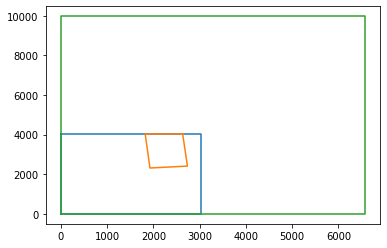

In [5]:
# Translation
dx = -1 * cam.exterior.coords[0][0]
dy = -1 * cam.exterior.coords[0][1]

# Rotation
cos_theta = np.cos(np.deg2rad(rot-90))
sin_theta = np.sin(np.deg2rad(rot-90))

# Create the 6-tuple for the affine transform
affine_tuple = (cos_theta, -sin_theta, dx, sin_theta, cos_theta, dy)

# Apply the affine transform
intersection = affinity.affine_transform(intersection, affine_tuple)
cam = affinity.affine_transform(cam, affine_tuple)

# intersection = affinity.translate(intersection,yoff=-1*cam.exterior.coords[1][1])
# cam = affinity.translate(cam,yoff=-1*cam.exterior.coords[1][1])

# cam = affinity.translate(cam,-1*cam.exterior.coords[0][0],-1*cam.exterior.coords[0][1])

plt.plot(*cam.exterior.xy)
plt.plot(*intersection.exterior.xy)
plt.plot(*bgd.exterior.xy)

In [19]:
print(*cam.exterior.coords)

(0.0, 0.0) (0.0, -4032.0) (3040.0, -4032.0) (3040.0, 0.0) (0.0, 0.0)


In [ ]:
valid_bbox = False
fnl_bbox = []
while valid_bbox == False:
    rot_bbox = random.randint(0, 359)
    rot_bbox_tht = math.radians(rot_bbox)
    print(rot_bbox)
    minx, miny, maxx, maxy = intersection.bounds
    corner_bbox = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
    while not intersection.contains(corner_bbox):
        corner_bbox = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
    print(corner_bbox)
    box = [[0, 0], [24, 0], [24, 36], [0, 36]]
    rot_bbox_arr = [[math.cos(rot_bbox_tht), -1 * math.sin(rot_bbox_tht)], [math.sin(rot_bbox_tht), math.cos(rot_bbox_tht)]]
    rot_bbox_box = np.dot(box, rot_bbox_arr)
    fnl_bbox = []
    for i in range(len(box)):
            print(rot_bbox_box[i])
            # print(corner_bbox.x)
            coord_bbox = np.add(rot_bbox_box[i], [corner_bbox.x, corner_bbox.y])
            print(coord_bbox)
            fnl_bbox.append(list(coord_bbox))
    print(fnl_bbox)
    poly_bbox = Polygon(fnl_bbox)
    if poly_bbox.within(intersection):
        valid_bbox = True
        print("pog")
    else:
        valid_bbox = False
print(poly_bbox)

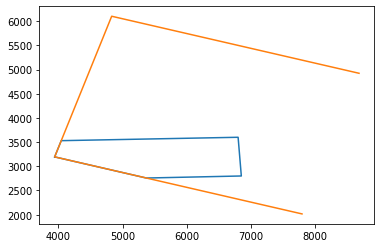

In [11]:
# fnl_bbox.append(fnl_bbox[0])
# plt.plot(*zip(*fnl_bbox))
plt.plot(*intersection.exterior.xy)
# print(fnl_box)
plt.plot(*zip(*fnl_box))
# plt.plot(*bgd.exterior.xy)
plt.show()